In [44]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [45]:
yelp = pd.read_csv("../DAT-DC-10/data/yelp.csv", sep=',')

In [46]:
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0


In [47]:
yelp.shape

(10000, 10)

In [48]:
yelp.groupby("stars").describe()

cool        funny       useful
stars                                             
1     count   749.000000   749.000000   749.000000
      mean      0.576769     1.056075     1.604806
      std       1.474759     2.480309     2.302354
      min       0.000000     0.000000     0.000000
      25%       0.000000     0.000000     0.000000
      50%       0.000000     0.000000     1.000000
      75%       1.000000     1.000000     2.000000
      max      17.000000    30.000000    20.000000
2     count   927.000000   927.000000   927.000000
      mean      0.719525     0.875944     1.563107
      std       1.491182     1.837553     1.969546
      min       0.000000     0.000000     0.000000
      25%       0.000000     0.000000     0.000000
      50%       0.000000     0.000000     1.000000
      75%       1.000000     1.000000     2.000000
      max      14.000000    20.000000    17.000000
3     count  1461.000000  1461.000000  1461.000000
      mean      0.788501     0.694730     1.306639
      std       1.602576     1.643553     1.985327
      min       0.000000     0.000000     0.000000
      25%       0.000000     0.000000     0.000000
      50%       0.000000     0.000000     1.000000
      75%       1.000000     1.000000     2.000000
      max      18.000000    24.000000    19.000000
4     count  3526.000000  3526.000000  3526.000000
      mean      0.954623     0.670448     1.395916
      std       2.034367     1.962417     2.236087
      min       0.000000     0.000000     0.000000
      25%       0.000000     0.000000     0.000000
      50%       0.000000     0.000000     1.000000
      75%       1.000000     1.000000     2.000000
      max      38.000000    57.000000    38.000000
5     count  3337.000000  3337.000000  3337.000000
      mean      0.944261     0.608631     1.381780
      std       2.484583     1.815606     2.659065
      min       0.000000     0.000000     0.000000
      25%       0.000000     0.000000     0.000000
      50%       0.000000     0.000000     1.000000
      75%       1.000000     1.000000     2.000000
      max      77.000000    39.000000    76.000000

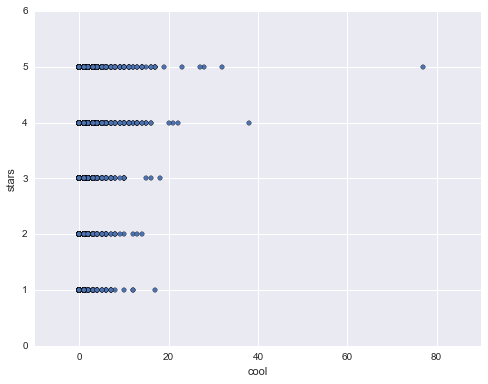

In [49]:
yelp.plot(kind="scatter", x="cool", y="stars")

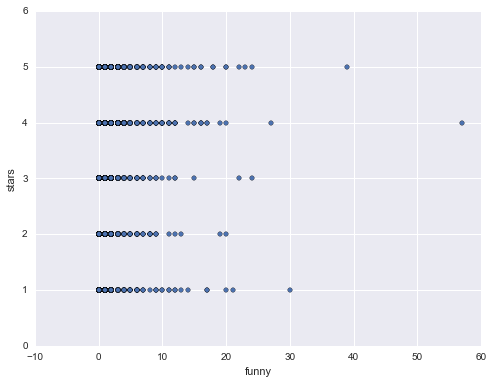

In [50]:
yelp.plot(kind="scatter", x="funny", y="stars")

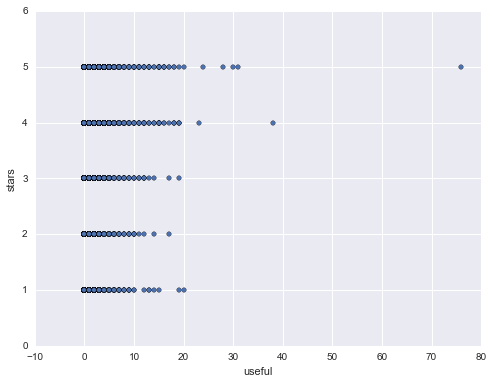

In [51]:
yelp.plot(kind="scatter", x="useful", y="stars")

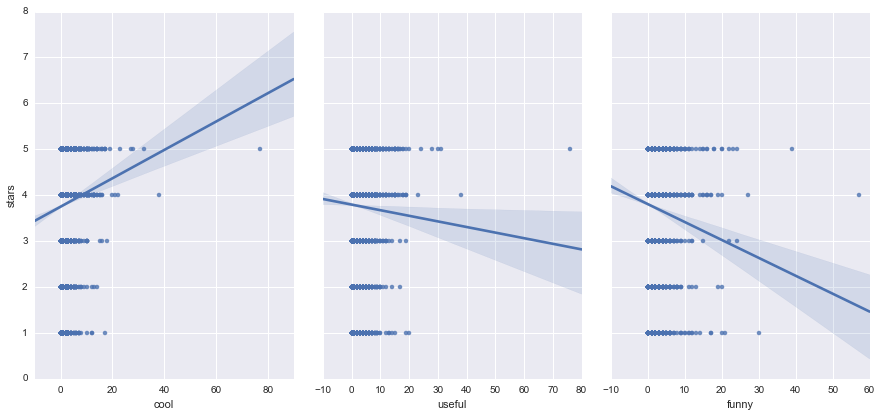

In [52]:
##from answer key -- pair plot w reg lines

sns.pairplot(yelp, x_vars=['cool', 'useful', 'funny'], y_vars='stars', size=6, aspect=0.7, kind='reg')

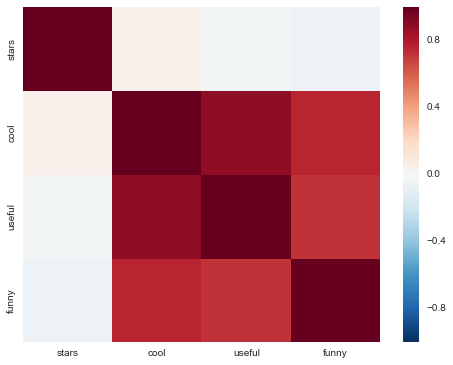

In [53]:
##from answer key -- correlation matrix

sns.heatmap(yelp.corr())

In [54]:
feature_cols = ["cool", "funny", "useful"]
X = yelp[feature_cols]

In [55]:
y = yelp.stars

In [56]:
linreg = LinearRegression()

In [57]:
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
linreg.coef_

array([ 0.27435947, -0.13567449, -0.14745239])

In [59]:
##from answer key -- zip features with coefs
zip(feature_cols, linreg.coef_)

[('cool', 0.2743594685885889),
 ('funny', -0.13567449053706879),
 ('useful', -0.14745239099399904)]

In [60]:
from sklearn import metrics
import numpy as np
from sklearn.cross_validation import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [62]:
def train_test_rmse(feature_cols):
    X = yelp[feature_cols]
    y = yelp.stars
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    prediction = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, prediction))

In [63]:
print train_test_rmse(['cool', 'funny', 'useful'])

1.17336862742


In [64]:
print train_test_rmse(['cool', 'funny'])

1.1851949299


In [65]:
print train_test_rmse(['cool', 'useful'])

1.18537944234


In [66]:
print train_test_rmse(['cool'])

1.20049049928


In [67]:
print train_test_rmse(['funny'])

1.20043591364


In [68]:
print train_test_rmse(['useful'])

1.20143488625


In [69]:
print train_test_rmse(['funny', 'useful'])

1.20070113589
